# Chebyshev Polynomial

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ChebyshevPolynomial`
Block encoding of $T_j(A / \alpha)$ where $T_j$ is the $j$-th Chebyshev polynomial.

Given a Hermitian matrix $A$ with spectral norm $|A| \le 1$, recall:

\begin{align*}
    T_0[A] &= I \\
    T_1[A] &= A \\
    T_2[A] &= 2 A^2 - I \\
    T_3[A] &= 4 A^3 - 3 A \\
    &\dots
\end{align*}

If `block_encoding` block encodes $A$ with normalization factor $\alpha$, i.e. it constructs
$\mathcal{B}[A/\alpha]$, then this bloq constructs $\mathcal{B}[T_j(A/\alpha)]$ with
normalization factor 1. Note that $\mathcal{B}[T_j(A/\alpha)]$ is not a multiple of
$\mathcal{B}[T_j(A)]$ in general; use `ScaledChebyshevPolynomial` if $\alpha \neq 1$.

See https://github.com/quantumlib/Qualtran/issues/984 for an alternative.

#### Parameters
 - `block_encoding`: Block encoding of a Hermitian matrix $A$, $\mathcal{B}[A]$. Assumes the $|G\rangle$ state of the block encoding is the identity operator.
 - `order`: order of Chebychev polynomial. 

#### References
 - [Quantum computing enhanced computational catalysis](https://arxiv.org/abs/2007.14460).     von Burg et al. 2007. Page 45; Theorem 1.


In [2]:
from qualtran.bloqs.block_encoding import ChebyshevPolynomial

### Example Instances

In [3]:
from qualtran.bloqs.basic_gates import Hadamard, XGate
from qualtran.bloqs.block_encoding import LinearCombination, Unitary

bloq = LinearCombination((Unitary(XGate()), Unitary(Hadamard())), (0.5, 0.5), lambd_bits=1)
chebyshev_poly_even = ChebyshevPolynomial(bloq, order=4)

In [4]:
from qualtran.bloqs.basic_gates import Hadamard
from qualtran.bloqs.block_encoding import Unitary

bloq = Unitary(Hadamard())
chebyshev_poly_odd = ChebyshevPolynomial(bloq, order=5)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([chebyshev_poly_even, chebyshev_poly_odd],
           ['`chebyshev_poly_even`', '`chebyshev_poly_odd`'])

### Call Graph

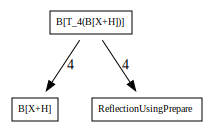

#### Counts totals:
 - `B[X+H]`: 4
 - `ReflectionUsingPrepare`: 4

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
chebyshev_poly_even_g, chebyshev_poly_even_sigma = chebyshev_poly_even.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(chebyshev_poly_even_g)
show_counts_sigma(chebyshev_poly_even_sigma)

## `ScaledChebyshevPolynomial`
Block encoding of $T_j(A)$ where $T_j$ is the $j$-th Chebyshev polynomial.

Unlike `ChebyshevPolynomial`, this bloq accepts $\mathcal{B}[A/\alpha]$ with $\alpha \neq 1$
and constructs $\mathcal{B}[T_j(A)]$ which is not a multiple of $\mathcal{B}[T_j(A/\alpha)]$
in general. It does so by constructing $T_k(t)$ in terms of $T_j(t/\alpha)$ for $j \in [0, k]$.

#### Parameters
 - `block_encoding`: Block encoding of a Hermitian matrix $A$, $\mathcal{B}[A/\alpha]$. Assumes the $|G\rangle$ state of the block encoding is the identity operator.
 - `order`: order of Chebychev polynomial.
 - `lambd_bits`: number of bits to represent coefficients of linear combination precisely. 

#### References
 - [Explicit Quantum Circuits for Block Encodings of Certain Sparse Matrices](https://arxiv.org/abs/2203.10236). Camps et al. (2023). Section 5.1.


In [7]:
from qualtran.bloqs.block_encoding import ScaledChebyshevPolynomial

### Example Instances

In [8]:
from qualtran.bloqs.basic_gates import Hadamard, XGate
from qualtran.bloqs.block_encoding import LinearCombination, Unitary

bloq = LinearCombination((Unitary(XGate()), Unitary(Hadamard())), (1.0, 1.0), lambd_bits=1)
scaled_chebyshev_poly_even = ScaledChebyshevPolynomial(bloq, order=4)

In [9]:
from attrs import evolve

from qualtran.bloqs.basic_gates import Hadamard
from qualtran.bloqs.block_encoding import Unitary

bloq = evolve(Unitary(Hadamard()), alpha=3.14)
scaled_chebyshev_poly_odd = ScaledChebyshevPolynomial(bloq, order=5)

#### Graphical Signature

In [10]:
from qualtran.drawing import show_bloqs
show_bloqs([scaled_chebyshev_poly_even, scaled_chebyshev_poly_odd],
           ['`scaled_chebyshev_poly_even`', '`scaled_chebyshev_poly_odd`'])

### Call Graph

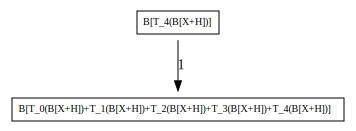

#### Counts totals:
 - `B[T_0(B[X+H])+T_1(B[X+H])+T_2(B[X+H])+T_3(B[X+H])+T_4(B[X+H])]`: 1

In [11]:
from qualtran.resource_counting.generalizers import ignore_split_join
scaled_chebyshev_poly_even_g, scaled_chebyshev_poly_even_sigma = scaled_chebyshev_poly_even.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(scaled_chebyshev_poly_even_g)
show_counts_sigma(scaled_chebyshev_poly_even_sigma)